<a href="https://colab.research.google.com/github/software-artisan/computer_vision_eva6_tsai/blob/main/session_5_code_drill_down/assignment_5_8k_parameters_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from collections import OrderedDict


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        dropout=0.05
 
        ####### 
        # Convolution Block #1
        #########
        self.conv1_1_3_3_8_p = nn.Sequential(OrderedDict([
            ('conv1_1_3_3_8_p', nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1, bias=False)),
            ('relu', nn.ReLU()),
            ('batchNorm2d', nn.BatchNorm2d(num_features=8)),
            ('dropOut2d', nn.Dropout2d(p=dropout))
          ])
        ) # Input=28, Output=28, rf=3

        self.conv2_8_3_3_8_p = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=8),
            nn.Dropout2d(p=dropout)
        ) # Input=28, Output=28, rf=5
 
        self.conv3_8_3_3_8_p = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=8),
            nn.Dropout2d(p=dropout) 
        ) # Input=28, Output=28, rf=10
 
        ####### 
        # Transition Block #1
        #########
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2) # Input=28, Output=14, rf=6
 
        self.conv4_8_1_1_16 = nn.Sequential(
            #nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0, bias=False),
            nn.Conv2d(in_channels=8, out_channels=12, kernel_size=1, padding=0, bias=False),
        ) # Input=14, Output=14, rf=32
 
        ####### 
        # Convolution Block #2
        #########
        self.conv5_12_3_3_12 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=12),
            nn.Dropout2d(p=dropout)
        ) # Input=14, Output=12, rf=14
 
        self.conv6_12_3_3_12 = nn.Sequential(
            #nn.Conv2d(in_channels=14, out_channels=14, kernel_size=3, padding=0, bias=False),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=12),
            nn.Dropout2d(p=dropout) # Input=12, Output=10, rf=24
        )
        
        self.conv7_12_3_3_12 = nn.Sequential(
            #nn.Conv2d(in_channels=14, out_channels=14, kernel_size=3, padding=0, bias=False),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=12),
            nn.Dropout2d(p=dropout) # Input=10, Output=8, rf=24
        )
        
        self.conv8_12_3_3_12 = nn.Sequential(
            #nn.Conv2d(in_channels=14, out_channels=14, kernel_size=3, padding=0, bias=False),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=12),
            nn.Dropout2d(p=dropout) # Input=8, Output=6, rf=24
        )

        self.conv9_12_3_3_12 = nn.Sequential(
            #nn.Conv2d(in_channels=14, out_channels=14, kernel_size=3, padding=0, bias=False),
            nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=12),
            nn.Dropout2d(p=dropout) # Input=6, Output=4, rf=24
        )
        
        self.maxpool2= nn.MaxPool2d(kernel_size=2, stride=2) # Input=4, Output=2, rf=16
 
        ####### 
        # Output Block
        #########
        # global average pool before 1x1 to reduce computation
        self.global_avgpool = nn.AdaptiveAvgPool2d(output_size=1)  # Input=5, Output=1, rf=40
 
        self.conv10_16_1_1_10 = nn.Sequential(
            #nn.Conv2d(in_channels=14, out_channels=10, kernel_size=3, padding=0, bias=False),
            nn.Conv2d(in_channels=12, out_channels=10, kernel_size=1, padding=0, bias=False),
        ) # Input=1, Output=1, rf=32
    
    def forward(self, x):
        #####
        # conv block #1
        ########
        x = self.conv1_1_3_3_8_p(x)
        x = self.conv2_8_3_3_8_p(x)
        x = self.conv3_8_3_3_8_p(x)
 
        #####
        # Transitioni block #1
        ########
        x = self.maxpool1(x)
        x = self.conv4_8_1_1_16(x)
 
        #####
        # conv block #2
        ########
        x = self.conv5_12_3_3_12(x)
        x = self.conv6_12_3_3_12(x)
        x = self.conv7_12_3_3_12(x)
        x = self.conv8_12_3_3_12(x)
        x = self.conv9_12_3_3_12(x)

        #######
        # Transition block #2
        #######
        x = self.maxpool2(x)
 
        #####
        # output block
        ########
        x = self.global_avgpool(x)        
        x = self.conv10_16_1_1_10(x)
               
        x = x.view(-1, 10)
        return F.log_softmax(x)

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
         Dropout2d-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             576
              ReLU-6            [-1, 8, 28, 28]               0
       BatchNorm2d-7            [-1, 8, 28, 28]              16
         Dropout2d-8            [-1, 8, 28, 28]               0
            Conv2d-9            [-1, 8, 28, 28]             576
             ReLU-10            [-1, 8, 28, 28]               0
      BatchNorm2d-11            [-1, 8, 28, 28]              16
        Dropout2d-12            [-1, 8, 28, 28]               0
        MaxPool2d-13            [-1, 8, 14, 14]               0
           Conv2d-14           [-1, 12,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:132: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:
# SEED=1 so that we use the same random images for training, during each mini batch, during each epoch
SEED=1
torch.manual_seed(SEED)

batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

# download training data set: 50,000 images
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.RandomRotation((-7.0, 7.0), fill=(1,)),

                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

# download test data set: 10,000 images
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, y_target) in enumerate(pbar):
    # get samples of 'batchsize'
    data, y_target = data.to(device), y_target.to(device)

    # So zero out the gradients before starting backpropragation because, without this, PyTorch accumulates gradients on subsequent backward passes. 
    optimizer.zero_grad()

    # predict
    y_pred = model(data)

    # Calculate loss
    loss = F.nll_loss(y_pred, y_target)     # negative log likelihood
    train_losses.append(loss)
    
    loss.backward()  # do backpropagation across the graph:  dho(loss)/dho(weight)
    optimizer.step() # adjust the weights

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max element
    correct += pred.eq(y_target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Train phase: Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
  train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, y_target in test_loader:
            data, y_target = data.to(device), y_target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, y_target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(y_target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print(f'\nTest phase: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.2f}%)\n')
    
    test_acc.append(100. * correct / len(test_loader.dataset))

In [ ]:
from torch.optim.lr_scheduler import StepLR
 
model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.19, momentum=0.9)
scheduler = StepLR(optimizer, step_size=7, gamma=0.5)
 
EPOCHS = 20
for epoch in range(EPOCHS):
    print("Epoch:", epoch+1)
    train(model, device, train_loader, optimizer)
    test(model, device, test_loader)
    scheduler.step()

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:132: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Train phase: Loss=0.08934513479471207 Batch_id=468 Accuracy=91.48: 100%|██████████| 469/469 [00:28<00:00, 16.41it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0624, Accuracy: 9792/10000 (97.92%)

Epoch: 2


Train phase: Loss=0.07751255482435226 Batch_id=468 Accuracy=96.53: 100%|██████████| 469/469 [00:28<00:00, 16.63it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0507, Accuracy: 9846/10000 (98.46%)

Epoch: 3


Train phase: Loss=0.06433220952749252 Batch_id=468 Accuracy=97.22: 100%|██████████| 469/469 [00:28<00:00, 16.68it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0380, Accuracy: 9877/10000 (98.77%)

Epoch: 4


Train phase: Loss=0.055138781666755676 Batch_id=468 Accuracy=97.47: 100%|██████████| 469/469 [00:27<00:00, 16.89it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0390, Accuracy: 9876/10000 (98.76%)

Epoch: 5


Train phase: Loss=0.05894872918725014 Batch_id=468 Accuracy=97.75: 100%|██████████| 469/469 [00:27<00:00, 16.95it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0328, Accuracy: 9893/10000 (98.93%)

Epoch: 6


Train phase: Loss=0.028114916756749153 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:27<00:00, 16.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0293, Accuracy: 9903/10000 (99.03%)

Epoch: 7


Train phase: Loss=0.07694645971059799 Batch_id=468 Accuracy=97.95: 100%|██████████| 469/469 [00:27<00:00, 16.94it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0311, Accuracy: 9908/10000 (99.08%)

Epoch: 8


Train phase: Loss=0.04560917988419533 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:27<00:00, 17.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0261, Accuracy: 9922/10000 (99.22%)

Epoch: 9


Train phase: Loss=0.01580813340842724 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:27<00:00, 17.12it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0250, Accuracy: 9921/10000 (99.21%)

Epoch: 10


Train phase: Loss=0.07992362231016159 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:27<00:00, 17.10it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0241, Accuracy: 9920/10000 (99.20%)

Epoch: 11


Train phase: Loss=0.03570769727230072 Batch_id=468 Accuracy=98.44: 100%|██████████| 469/469 [00:27<00:00, 17.16it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0230, Accuracy: 9927/10000 (99.27%)

Epoch: 12


Train phase: Loss=0.033059410750865936 Batch_id=468 Accuracy=98.54: 100%|██████████| 469/469 [00:27<00:00, 16.82it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0236, Accuracy: 9917/10000 (99.17%)

Epoch: 13


Train phase: Loss=0.021624354645609856 Batch_id=468 Accuracy=98.43: 100%|██████████| 469/469 [00:27<00:00, 17.19it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0247, Accuracy: 9913/10000 (99.13%)

Epoch: 14


Train phase: Loss=0.031596675515174866 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:28<00:00, 16.72it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0218, Accuracy: 9938/10000 (99.38%)

Epoch: 15


Train phase: Loss=0.13530859351158142 Batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:27<00:00, 16.76it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0230, Accuracy: 9932/10000 (99.32%)

Epoch: 16


Train phase: Loss=0.006721511948853731 Batch_id=468 Accuracy=98.72: 100%|██████████| 469/469 [00:28<00:00, 16.71it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0209, Accuracy: 9938/10000 (99.38%)

Epoch: 17


Train phase: Loss=0.017367525026202202 Batch_id=468 Accuracy=98.66: 100%|██████████| 469/469 [00:28<00:00, 16.73it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0209, Accuracy: 9934/10000 (99.34%)

Epoch: 18


Train phase: Loss=0.053700756281614304 Batch_id=468 Accuracy=98.71: 100%|██████████| 469/469 [00:27<00:00, 16.97it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0221, Accuracy: 9929/10000 (99.29%)

Epoch: 19


Train phase: Loss=0.04914354905486107 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:27<00:00, 16.88it/s]
  0%|          | 0/469 [00:00<?, ?it/s]


Test phase: Average loss: 0.0190, Accuracy: 9933/10000 (99.33%)

Epoch: 20


Train phase: Loss=0.04622117802500725 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:27<00:00, 16.82it/s]



Test phase: Average loss: 0.0202, Accuracy: 9940/10000 (99.40%)



In [ ]:
import matplotlib.pyplot as plt
def plot_accuracy(train_accuracy_list, test_accuracy_list):
    fig, axs = plt.subplots(figsize=(5,5))
    axs.plot(train_acc, label="Train Accuracy")
    axs.plot(test_acc, label="Test Accuracy")
    axs.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.show()

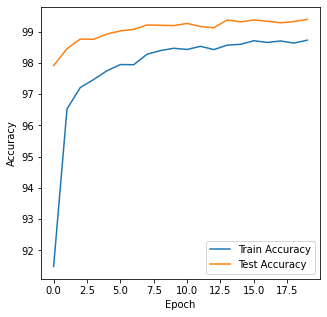

In [ ]:
plot_accuracy(train_acc, test_acc)